In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/USC assignments/archive.zip" -d "/content/drive/MyDrive/USC assignments/Diabetes classifier/"

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/USC assignments/Diabetes classifier/diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data=data.dropna()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

svc = SVC()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
import joblib

best_model = grid_search.best_estimator_
val_pred = best_model.predict(x_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy with SVM: {val_accuracy:.2f}")

joblib.dump(best_model, '/content/drive/MyDrive/USC assignments/Diabetes classifier/best_svm_model.pkl')

Validation Accuracy with SVM: 0.77


['/content/drive/MyDrive/USC assignments/Diabetes classifier/best_svm_model.pkl']

In [ ]:
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy with SVM: {accuracy:.2f}")
print("Classification Report:\n", report)


Test Accuracy with SVM: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.67      0.60      0.63        52

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



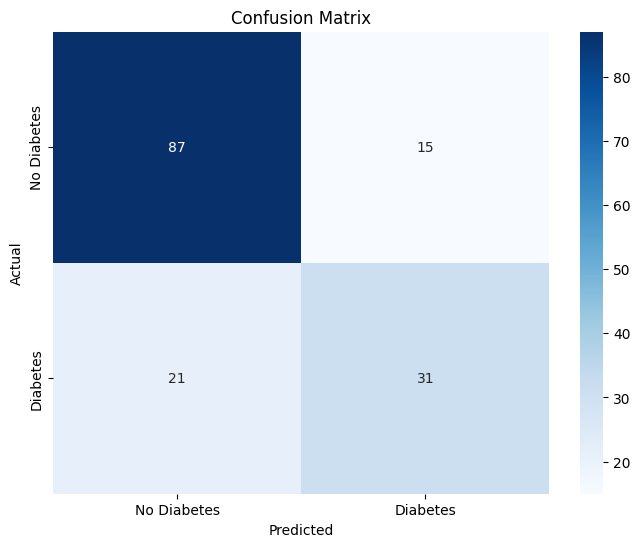

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_decision_boundary(model, X, y):
    if X.shape[1] != 2:
        print("Decision boundary visualization requires 2D features.")
        return

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary")
    plt.show()



plot_decision_boundary(best_model, x_train.values, y_train.values)

Decision boundary visualization requires 2D features.
